# Systematic Trading Skeleton Code

The code below install all required packages and then reads inthe list of tickers from wikipedia to then pull the data for the current S&P 500 from yahoo finance.

The DataFrame produced also needs to be cleaned due to the large number of NaN values stored inside and it is up to you to decide exactly how to do this. 

A lot of these NaN values arise because the stock price data for a specific company is not stored on Yahoo finance before a certain date. This could be for multiple reasons. 

The code has been set to remove all dates with NaN values although this only gives approx 6 mounths of data for backtesting. If you want to use more dates for backtesting then this will need to be changed.



In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
tickers = list(pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"].dropna())

for i in range(len(tickers)):
  tickers[i] = tickers[i].replace(".","-")
  if i % 50 == 0:
    print(tickers[i])
# feel free to change this time value although if you choose a date that was more than 10 years ago it will take yf a while to download all the data
data = yf.download(tickers,"2015-01-01")

MMM
AJG
CDAY
DFS
FIS
IR
MMC
NXPI
RSG
TT
ZBH
[*********************100%***********************]  503 of 503 completed


In [4]:
data.head()

Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2014-12-31        NaN        NaN         NaN        NaN        NaN        NaN   
2015-01-02  37.941986  51.079910  149.859680  24.603203  46.979836  79.853500   
2015-01-05  37.231030  51.051491  147.884399  23.910097  46.095711  79.173782   
2015-01-06  36.651054  50.255585  147.780396  23.912346  45.867558  79.606316   
2015-01-07  37.137493  50.227154  150.956055  24.247648  47.721367  81.195282   

                                                        ...     Volume  \
                 ABMD        ABT       ACGL        ACN  ...       WYNN   
Date                                                    ...              
2014-12-31        NaN        NaN        NaN        NaN  ...        NaN   
2015-01-02  37.310001  38.606468  19.496668  77.739197  ...  2228900.0   
2015-01-05  37.070000  38.615059  19.379999  76.426643  ...  1695100.0   
2015-01-06  36.130001  38.176552  19.423332  75.875351  ...  1975800.0   
2015-01-07  37.279999  38.486080  19.536667  77.467941  ...  1472000.0   

                                                                               \
                  XEL         XOM       XRAY        XYL        YUM        ZBH   
Date                                                                            
2014-12-31        NaN         NaN        NaN        NaN        NaN        NaN   
2015-01-02  2534900.0  10220400.0  1825800.0   605900.0  2283466.0   936579.0   
2015-01-05  3107200.0  18502400.0  1469800.0  1369900.0  4418651.0  2223873.0   
2015-01-06  4749600.0  16670700.0  1988400.0  1333200.0  5004401.0  1835563.0   
2015-01-07  2833400.0  13590700.0   959800.0  1038600.0  4554134.0  1505860.0   

                                            
                ZBRA       ZION        ZTS  
Date                                        
2014-12-31       NaN        NaN        NaN  
2015-01-02  411800.0  2298700.0  1784200.0  
2015-01-05  420300.0  5326000.0  3112100.0  
2015-01-06  527500.0  9086500.0  3977200.0  
2015-01-07  467800.0  2759900.0  2481800.0  

[5 rows x 3018 columns]

In [5]:
# running these commands can help to understand the shape of the dataframe object data
data.index

DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04'],
              dtype='datetime64[ns]', name='Date', length=1977, freq=None)

In [6]:
data.columns

MultiIndex([('Adj Close',    'A'),
            ('Adj Close',  'AAL'),
            ('Adj Close',  'AAP'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'ABBV'),
            ('Adj Close',  'ABC'),
            ('Adj Close', 'ABMD'),
            ('Adj Close',  'ABT'),
            ('Adj Close', 'ACGL'),
            ('Adj Close',  'ACN'),
            ...
            (   'Volume', 'WYNN'),
            (   'Volume',  'XEL'),
            (   'Volume',  'XOM'),
            (   'Volume', 'XRAY'),
            (   'Volume',  'XYL'),
            (   'Volume',  'YUM'),
            (   'Volume',  'ZBH'),
            (   'Volume', 'ZBRA'),
            (   'Volume', 'ZION'),
            (   'Volume',  'ZTS')],
           length=3018)

In [7]:
# We count the number of NaN values in store_items
x =  data.isnull().sum().sum()

# We print x
print('Number of NaN values in our DataFrame:', x)
data.isnull()

Number of NaN values in our DataFrame: 98862


Adj Close                                                          \
                   A    AAL    AAP   AAPL   ABBV    ABC   ABMD    ABT   ACGL   
Date                                                                           
2014-12-31      True   True   True   True   True   True   True   True   True   
2015-01-02     False  False  False  False  False  False  False  False  False   
2015-01-05     False  False  False  False  False  False  False  False  False   
2015-01-06     False  False  False  False  False  False  False  False  False   
2015-01-07     False  False  False  False  False  False  False  False  False   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
2022-10-31     False  False  False  False  False  False  False  False  False   
2022-11-01     False  False  False  False  False  False  False  False  False   
2022-11-02     False  False  False  False  False  False  False  False  False   
2022-11-03     False  False  False  False  False  False  False  False  False   
2022-11-04     False  False  False  False  False  False  False  False  False   

                   ... Volume                                            \
              ACN  ...   WYNN    XEL    XOM   XRAY    XYL    YUM    ZBH   
Date               ...                                                    
2014-12-31   True  ...   True   True   True   True   True   True   True   
2015-01-02  False  ...  False  False  False  False  False  False  False   
2015-01-05  False  ...  False  False  False  False  False  False  False   
2015-01-06  False  ...  False  False  False  False  False  False  False   
2015-01-07  False  ...  False  False  False  False  False  False  False   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
2022-10-31  False  ...  False  False  False  False  False  False  False   
2022-11-01  False  ...  False  False  False  False  False  False  False   
2022-11-02  False  ...  False  False  False  False  False  False  False   
2022-11-03  False  ...  False  False  False  False  False  False  False   
2022-11-04  False  ...  False  False  False  False  False  False  False   

                                 
             ZBRA   ZION    ZTS  
Date                             
2014-12-31   True   True   True  
2015-01-02  False  False  False  
2015-01-05  False  False  False  
2015-01-06  False  False  False  
2015-01-07  False  False  False  
...           ...    ...    ...  
2022-10-31  False  False  False  
2022-11-01  False  False  False  
2022-11-02  False  False  False  
2022-11-03  False  False  False  
2022-11-04  False  False  False  

[1977 rows x 3018 columns]

In [40]:
adj = data.iloc[1:, :503]
non_na = adj.isnull().sum().nsmallest(481)
tickers = [i[1] for i in non_na.index]
clean_data = yf.download(tickers,"2015-01-01")

[*********************100%***********************]  481 of 481 completed


In [47]:
data = clean_data.iloc[1:]
data.isnull().sum().sum()

0

In [9]:
def data_dropna():
  #  note the dataframe below has lots of NaN values because not all stocks were listed from 2016
  return data.dropna()

def data_team3():
  # #ENTER YOUR DATA CLEANING CODE HERE. 
  ## this should output all data you need for your strategy
  return data.dropna()

In [10]:
def buyandhold(start_date, end_date):
  strat = pd.DataFrame(data = np.ones([len(df),len(df.columns)])/len(df.columns), 
                       index = df.index)
  
  return strat

def strat_insert_team_name(start_date, end_date): # enter youre team name!!!
  # insert your strategy here!!!!!
  # note this function shoudl return a dataframe of weights with columns representing each stock
  # and index representing the same datetime index as the data used
  strat = pd.DataFrame(data = np.zeros([len(df),len(df.columns)]), 
                       index = df.index)
  return strat

In [11]:
def strategy(start_date, end_date, 
                  strat_func=buyandhold, data_func=data_dropna, 
                  fig_strat=True, risk_free_rate = 0.001):
  global df 
  df = data_func()["Adj Close"][start_date: end_date]
  return_df = np.array(df.pct_change())
  strat_df = pd.DataFrame(index = df.index)
  strat_df["daily returns"] = (return_df * strat_func(start_date, end_date).shift(1)).sum(axis=1)
  strat_df["cumulative % returns"] = ((strat_df["daily returns"]+1).cumprod() - 1) * 100
  
  sharpe  = 0.01*((strat_df["cumulative % returns"][-1]/100 - 
                    len(strat_df) * risk_free_rate) /
                    strat_df["daily returns"].std())
  if fig_strat:
    plt.figure()
    plt.title("Strategy Backtest from "+ start_date+" to "+end_date)
    plt.plot(strat_df["cumulative % returns"])
    plt.plot(strat_df["cumulative % returns"].rolling(25).mean())
    plt.show()
  
  return strat_df, sharpe
 

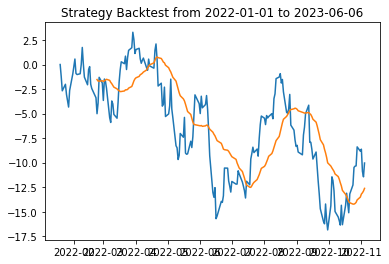

(            daily returns  cumulative % returns
 Date                                           
 2022-01-19       0.000000              0.000000
 2022-01-20      -0.012252             -1.225150
 2022-01-21      -0.014715             -2.678584
 2022-01-24       0.006833             -2.013546
 2022-01-25      -0.010514             -3.043811
 ...                   ...                   ...
 2022-10-31      -0.004794             -8.833516
 2022-11-01       0.002250             -8.628409
 2022-11-02      -0.024729            -10.887891
 2022-11-03      -0.006281            -11.447577
 2022-11-04       0.015894            -10.040084
 
 [202 rows x 2 columns],
 -0.20126447063173364)

In [12]:
strategy("2022-01-01", "2023-06-06") # example for buy and hold strategy after removing all dates with NaN values

In [13]:
 # use this cell to backtest your own strategy. make sure to change the function names
strategy("2022-01-01", "2023-06-06", strat_func = strat_insert_team_name, data_func = data_enter_team_name)

NameError: name 'data_enter_team_name' is not defined